In [1]:
import sys
sys.path += [".."] # os.path.abspath("../img-phy-sim")

import img_phy_sim as ips

import os
import random

In [2]:
data_path = "../datasets/physgen_train_raw/osm/"

img_src = data_path + random.sample(os.listdir(data_path), 1)[0]
img_src

'../datasets/physgen_train_raw/osm/input_physgen_13103.png'

Loaded Image:
    - Image size: 256x256
    - Bit depth: 64-bit
    - Dtype: float64


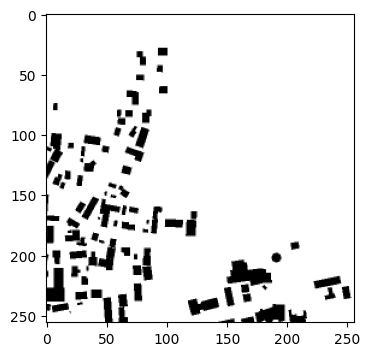

In [3]:
img = ips.img.open(src=img_src, should_scale=True, should_print=True)
ips.img.imshow(img, size=4, axis_off=False)

d:\Programme\Anaconda\envs\img-phy-sim\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


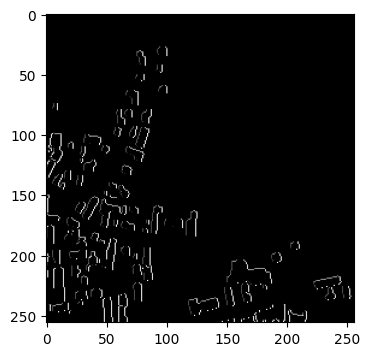

In [15]:
wall_map = ips.ray_tracing.get_wall_map(img, thickness=0)
ips.img.imshow(wall_map, size=4, axis_off=False)

d:\Programme\Anaconda\envs\img-phy-sim\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


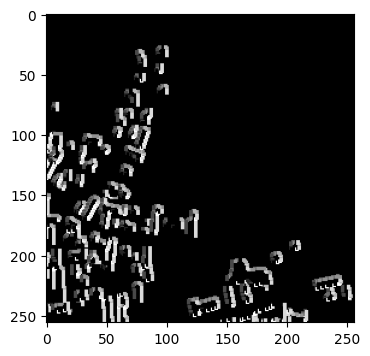

In [4]:
wall_map = ips.ray_tracing.get_wall_map(img)
ips.img.imshow(wall_map, size=4, axis_off=False)

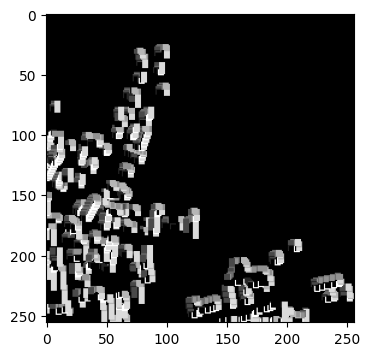

In [17]:
ips.img.imshow(ips.ray_tracing.get_wall_map(img, thickness=2), size=4, axis_off=False)

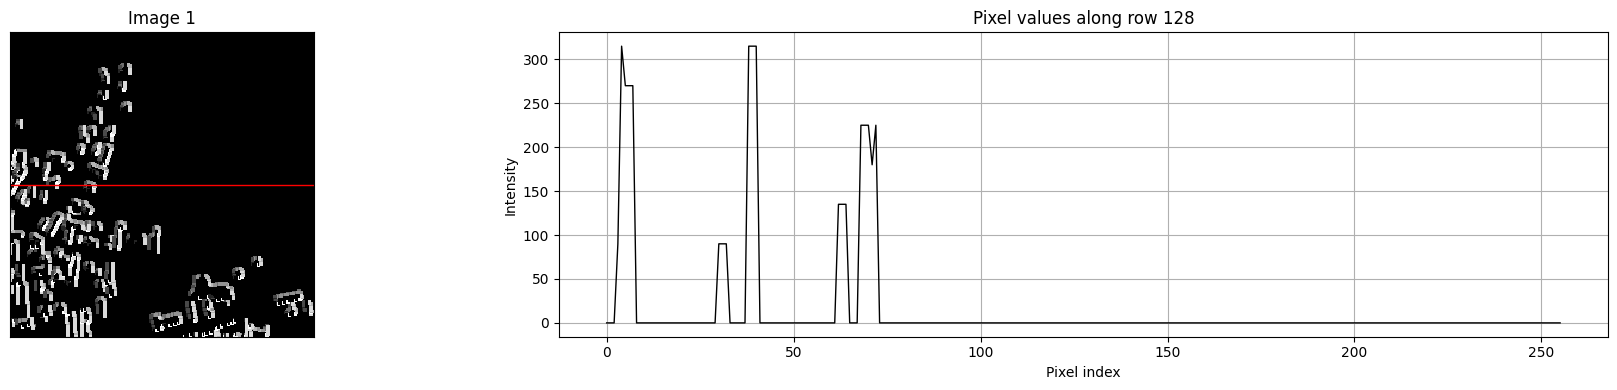

[array([  0,   0,   0,  90, 315, 270, 270, 270,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  90,  90,  90,   0,   0,   0,   0,   0, 315,
        315, 315,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 135, 135, 135,
          0,   0,   0, 225, 225, 225, 180, 225,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [5]:
ips.img.show_image_with_line_and_profile(imgs=[wall_map], axis='row', index=None, titles=None, figsize=(10, 4))

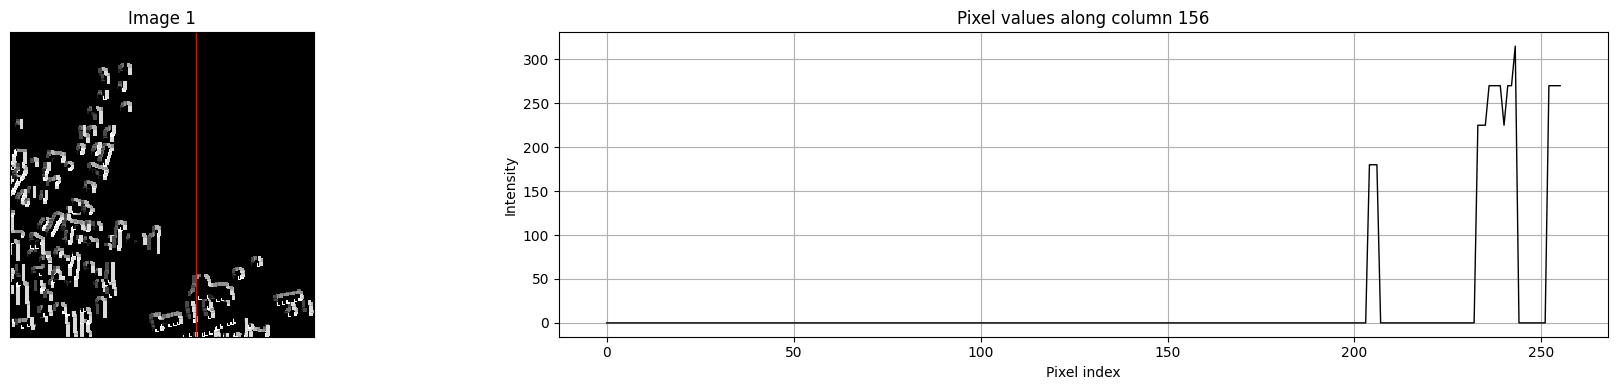

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [14]:
ips.img.show_image_with_line_and_profile(imgs=[wall_map], axis='column', index=156, titles=None, figsize=(10, 4))

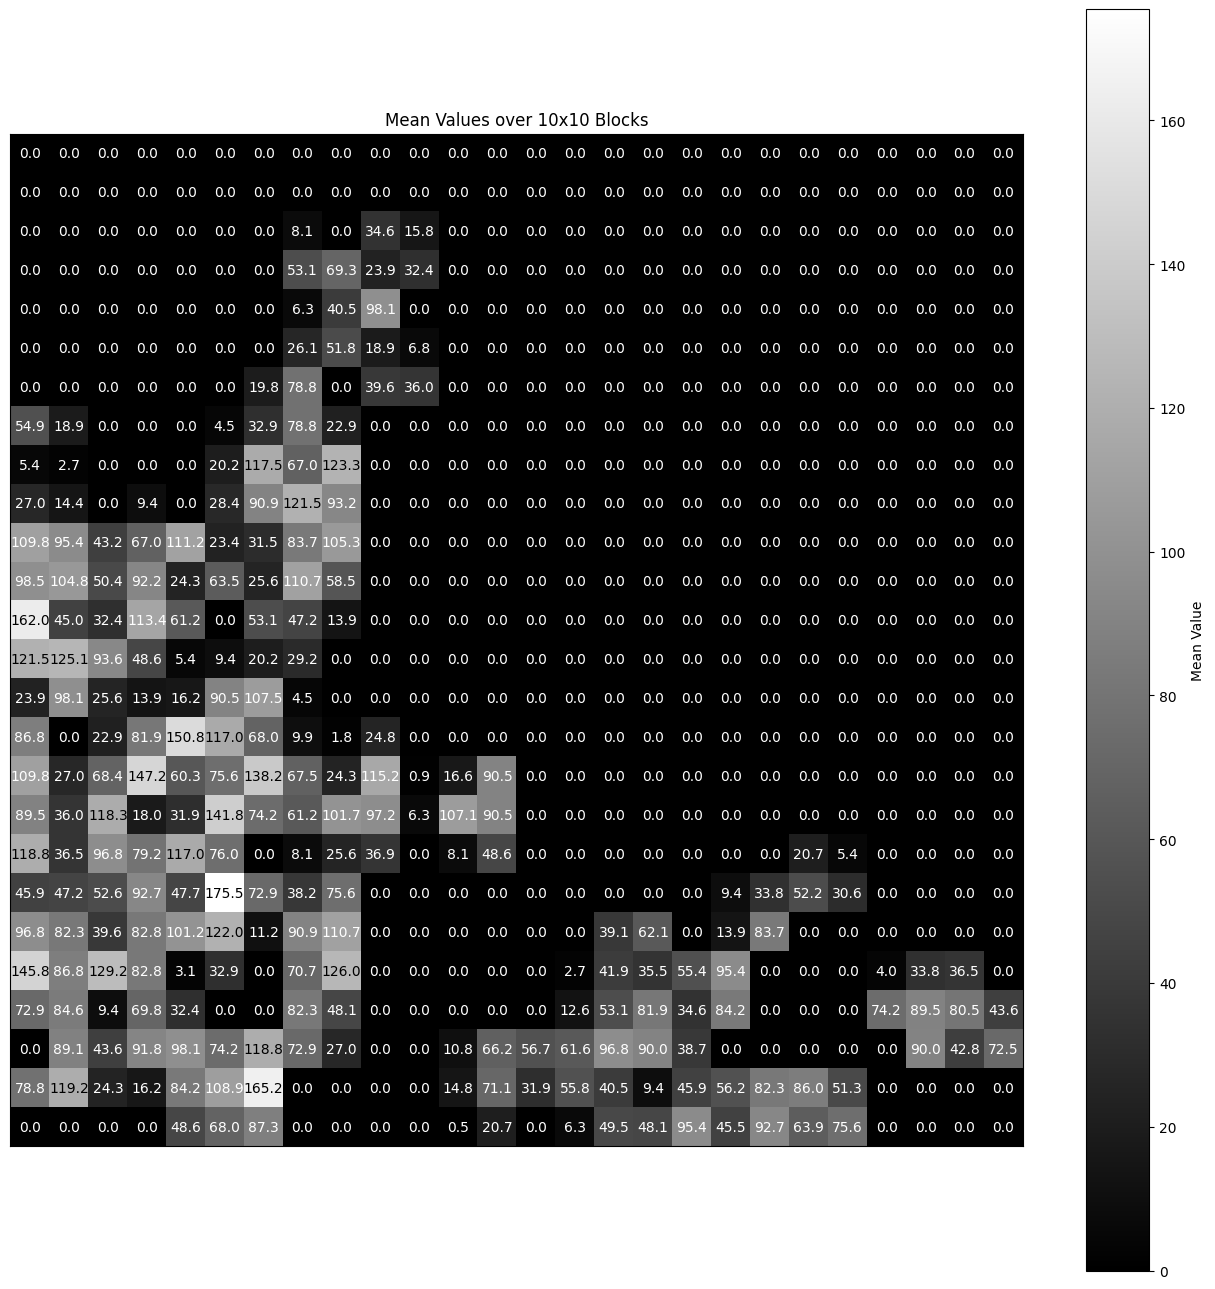

In [7]:
ips.img.plot_image_with_values(wall_map, block_size=10, cmap='gray', title=None, 
                           font_size=10, save_to=None)